<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task" data-toc-modified-id="Task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task</a></span></li><li><span><a href="#Solution" data-toc-modified-id="Solution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solution</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Task

*... our goal is to estimate the average “Finishing” score of all players...*

3. By repeatedly subsampling the dataset, estimate the sample variance of the SRS sampler in dependence of the sample size. Compare your result to the analytically-predicted value.

# Solution

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('fifa.csv')
df

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

<AxesSubplot:xlabel='k', ylabel='variance'>

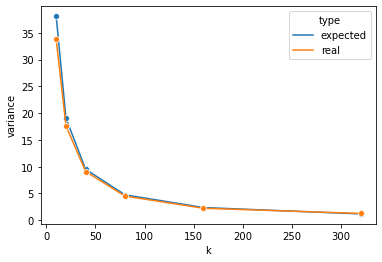

In [23]:
def expected_mean_variance(df, ks):
    N = len(df['Finishing'])
    var = df['Finishing'].var()
    expected_var = lambda k: var / k * (1 - (k - 1) / (N - 1))
    return np.array([expected_var(k) for k in ks])

def real_mean_variance(df, ks, n=100):
    sample_mean = lambda k: df['Finishing'].sample(k).mean()
    sample_n_times = lambda k, n: pd.Series([sample_mean(k) for i in range(n)])
    mean_variance = lambda ks: pd.DataFrame({k: sample_n_times(k, n) for k in ks}).var().to_numpy()
    return mean_variance(ks)

ks = [10, 20, 40, 80, 160, 320]

smv = pd.DataFrame({'variance': np.concatenate([expected_mean_variance(df, ks), real_mean_variance(df, ks)]), 
                    'type': np.array(['expected'] * len(ks) + ['real'] * len(ks)),
                    'k': np.array(ks * 2)})

sns.lineplot(data=smv, x='k', y='variance', hue='type', marker="o")

In [7]:
df.shape

(18207, 89)

In [26]:
ks_2 = [0.01, 0.02, 0.05, 0.1]
ks_num = [round(elem * int(df.shape[0])) for elem in ks_2]
print(ks_num)

[182, 364, 910, 1821]


<AxesSubplot:xlabel='k', ylabel='variance'>

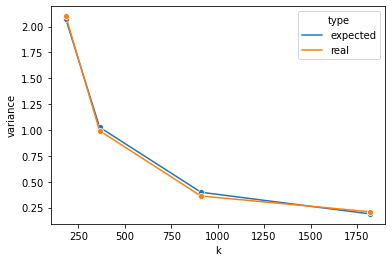

In [25]:
smv_2 = pd.DataFrame({'variance': np.concatenate([expected_mean_variance(df, ks_num), real_mean_variance(df, ks_num)]), 
                    'type': np.array(['expected'] * len(ks_num) + ['real'] * len(ks_num)),
                    'k': np.array(ks_num * 2)})

sns.lineplot(data=smv_2, x='k', y='variance', hue='type', marker="o")

In [22]:
smv_2["variance"]

0    2.073996
1    1.026527
2    0.398046
3    0.188437
4    1.906841
5    0.883568
6    0.427263
7    0.208798
Name: variance, dtype: float64

# Conclusion

The dataset contains “scores” that rate the performance of the individual players in different categories on
a scale from 0 to 100. Our goal is to estimate the sample variance of the SRS sampler in dependence of the sample size by  repeatedly subsampling the dataset “Finishing” column.

The next statistical experiment was conducted: for different values of k from 10 to 320 the Finishing column was sampled 100 times. For each sample its mean was calculated, after that the variance of this means was estimated. Simultaneously, the same value was estimated using the formula from the 43rd slide. As we can see from the final plot the bigger k gets the less difference between the analytically-predicted calculation and the practical one is observed.